In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats




In [2]:
#Loading and looking at the dataset
cars = pd.read_csv('mpg.csv')
cars.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d9e7f0>,
      dtype=object)

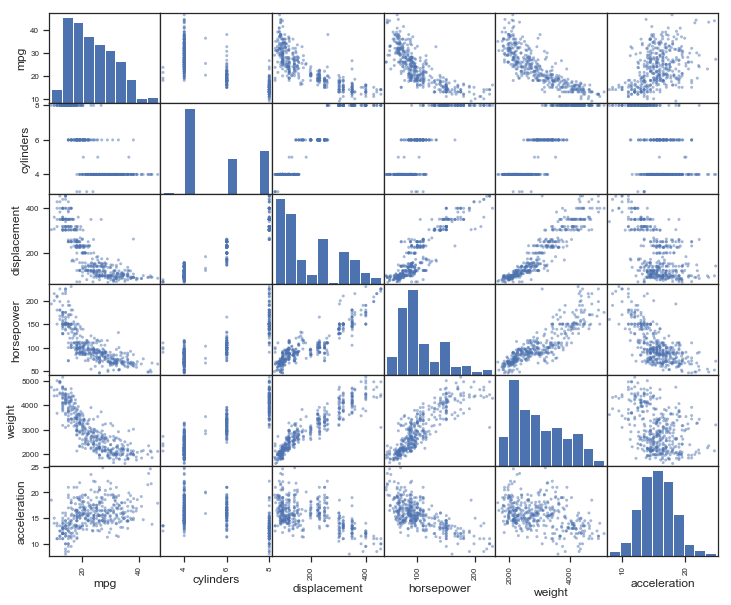

In [3]:
#aesthetics
sns.set_style("white") 
sns.set(style="ticks")
# creating a scatter matrix 
pd.scatter_matrix(cars.loc[:,'mpg':'acceleration'], figsize = (12,10))


In [4]:
# Making the correlation matrix.
carvars = cars.loc[:,'mpg':'acceleration']
carcorr = carvars.corr()
print(carcorr)



                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   

              acceleration  
mpg               0.420289  
cylinders        -0.505419  
displacement     -0.543684  
horsepower       -0.689196  
weight           -0.417457  
acceleration      1.000000  


AxesSubplot(0.125,0.125;0.775x0.755)


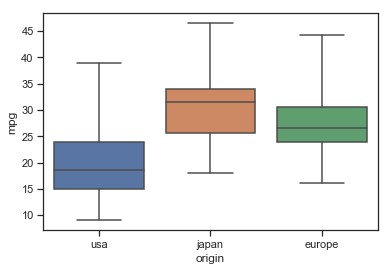

In [5]:
print(sns.boxplot(x="origin", y="mpg", data=cars, whis="range"))


AxesSubplot(0.125,0.125;0.775x0.755)


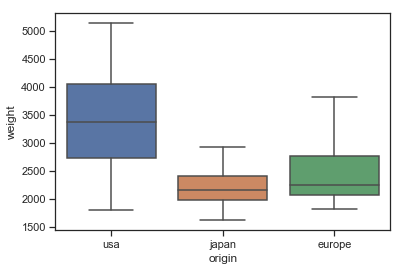

In [6]:
print(sns.boxplot(x="origin", y="weight", data=cars, whis="range"))


AxesSubplot(0.125,0.125;0.775x0.755)


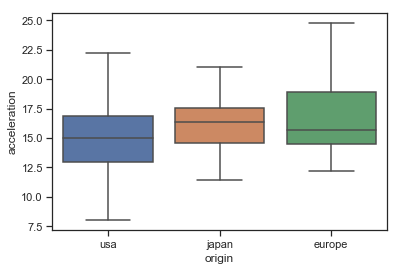

In [7]:
print(sns.boxplot(x="origin", y="acceleration", data=cars, whis="range"))


AxesSubplot(0.125,0.125;0.775x0.755)


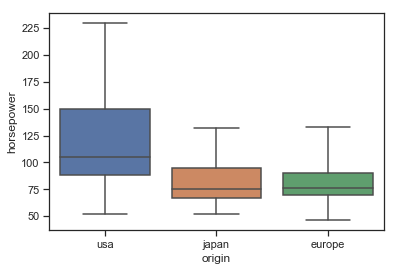

In [8]:
print(sns.boxplot(x="origin", y="horsepower", data=cars, whis="range"))


AxesSubplot(0.125,0.125;0.775x0.755)


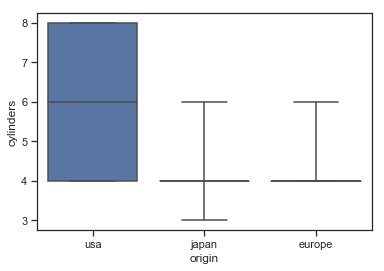

In [9]:
print(sns.boxplot(x="origin", y="cylinders", data=cars, whis="range"))

AxesSubplot(0.125,0.125;0.775x0.755)


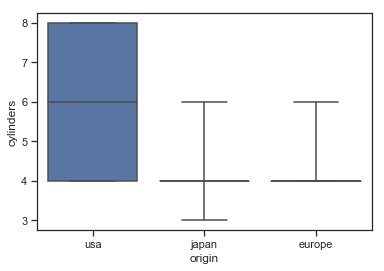

In [10]:
print(sns.boxplot(x="origin", y="cylinders", data=cars, whis="range"))

In [14]:
# Making dummies.
# creating a data frame to hold features.
cars = pd.read_csv('mpg.csv')
features = pd.get_dummies((cars['cylinders']))
features

# Adding on features 

features['six_cylinders']=np.where(cars['cylinders'].isin(['6']), 1, 0)
features['four_cylinders']=np.where(cars['cylinders'].isin(['4']), 1, 0)
features['eight_cylinders']=np.where(cars['cylinders'].isin(['8']), 1, 0)

features['lite'] = cars['weight']<=2223.75
features['light'] = np.where(cars['weight']<=2223.75, 1, 0) & np.where(cars['weight']>=1613, 1, 0)
features['midweight'] = np.where(cars['weight']>=2803.75, 1, 0) & np.where(cars['weight']>=3608, 1, 0)
features['heavy'] = np.where(cars['weight']<=5140.75, 1, 0) & np.where(cars['weight']>3608, 1, 0)

features['power']= (cars['horsepower'] + cars['acceleration'])/2
features['accleration_squared'] = cars['acceleration'] * cars['acceleration']
features['weight_per_displacement'] = cars['weight']/cars['displacement']
features['aacceleration_per_weight'] = cars['acceleration']/cars['weight']

features['mpg']=cars['mpg']

features

,3,4,5,6,8,six_cylinders,four_cylinders,eight_cylinders,lite,light,midweight,heavy,power,accleration_squared,weight_per_displacement,aacceleration_per_weight,mpg
0,0,0,0,0,1,0,0,1,False,0,0,0,71.00,144.00,11.413681,0.003425,18.0
1,0,0,0,0,1,0,0,1,False,0,1,1,88.25,132.25,10.551429,0.003114,15.0
2,0,0,0,0,1,0,0,1,False,0,0,0,80.50,121.00,10.805031,0.003201,18.0
3,0,0,0,0,1,0,0,1,False,0,0,0,81.00,144.00,11.292763,0.003495,16.0
4,0,0,0,0,1,0,0,1,False,0,0,0,75.25,110.25,11.420530,0.003044,17.0
5,0,0,0,0,1,0,0,1,False,0,1,1,104.00,100.00,10.118881,0.002304,15.0
6,0,0,0,0,1,0,0,1,False,0,1,1,114.50,81.00,9.590308,0.002067,14.0
7,0,0,0,0,1,0,0,1,False,0,1,1,111.75,72.25,9.800000,0.001971,14.0
8,0,0,0,0,1,0,0,1,False,0,1,1,117.50,100.00,9.725275,0.002260,14.0
9,0,0,0,0,1,0,0,1,False,0,1,1,99.25,72.25,9.871795,0.002208,15.0


In [12]:
print(cars['mpg'].groupby(features['six_cylinders']).describe())
print(cars['mpg'].groupby(features['four_cylinders']).describe())
print(cars['mpg'].groupby(features['eight_cylinders']).describe())


               count       mean       std   min   25%   50%     75%   max
six_cylinders                                                            
0              314.0  24.458599  8.330927   9.0  16.5  25.0  30.975  46.6
1               84.0  19.985714  3.807322  15.0  18.0  19.0  21.000  38.0
                count       mean       std   min   25%    50%   75%   max
four_cylinders                                                           
0               194.0  17.444845  4.372192   9.0  14.0  17.00  19.7  38.0
1               204.0  29.286765  5.710156  18.0  25.0  28.25  33.0  46.6
                 count       mean       std   min   25%   50%    75%   max
eight_cylinders                                                           
0                295.0  26.500339  6.718345  15.0  21.0  26.0  31.15  46.6
1                103.0  14.963107  2.836284   9.0  13.0  14.0  16.00  26.6


In [15]:
# Choosing the best features using correlation with mpg filtering method
featurescorr = features.corr()
print(featurescorr)


                                 3         4         5         6         8  \
3                         1.000000 -0.103323 -0.008781 -0.052114 -0.059537   
4                        -0.103323  1.000000 -0.089367 -0.530382 -0.605929   
5                        -0.008781 -0.089367  1.000000 -0.045075 -0.051496   
6                        -0.052114 -0.530382 -0.045075  1.000000 -0.305620   
8                        -0.059537 -0.605929 -0.051496 -0.305620  1.000000   
six_cylinders            -0.052114 -0.530382 -0.045075  1.000000 -0.305620   
four_cylinders           -0.103323  1.000000 -0.089367 -0.530382 -0.605929   
eight_cylinders          -0.059537 -0.605929 -0.051496 -0.305620  1.000000   
lite                     -0.000292  0.553319 -0.050484 -0.299617 -0.342294   
light                    -0.000292  0.553319 -0.050484 -0.299617 -0.342294   
midweight                -0.058368 -0.594027 -0.050484 -0.129263  0.821639   
heavy                    -0.058368 -0.594027 -0.050484 -0.129263

power, accleration_squared, weight_per_displacement, aacceleration_per_weight, and the cylinder types would be good features for this model because of the correaltions of each feature with the desired outcome: mpg. 
